# Lab 4. Homework

In this homework you will implement a Jackknife residuals from scratch.

***Note:*** the detailed description of Jackknife will be provided later in the course.

## Necessary imports & data definition

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Text(0.5, 1.0, 'Generated data')

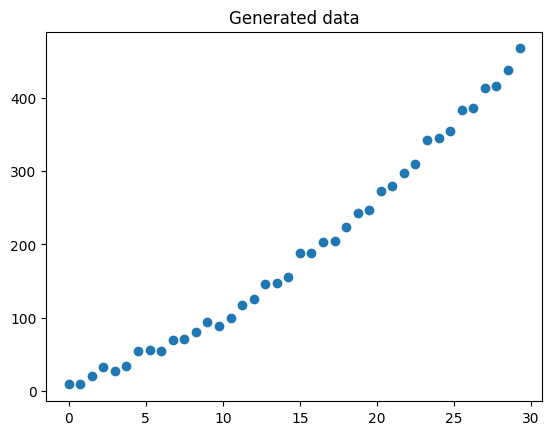

In [2]:
np.random.seed(42)
X = np.arange(0, 30, 0.75).reshape(-1, 1)
Y = 5 + 7 * X + 0.3 * X ** 2 + 7 * np.random.randn(*X.shape)

plt.scatter(X, Y)
plt.title('Generated data')

In [3]:
def polyreg_model(degree):
  return Pipeline([
      ('polynomial_features', PolynomialFeatures(degree)),
      ('linear_regression', LinearRegression())
  ])

## Simple residuals

The basic form of residuals is given as:

$$
  e_i = y_i - \hat{y}_i
$$

where $y_i$ - is a true value of the response and $\hat{y}_i$ - is a model prediction.

<font color='red'>TODO: compute simple residuals for `polyreg_model` of degree 1 and draw a scatter plot for residuals against the predicted values.</font>

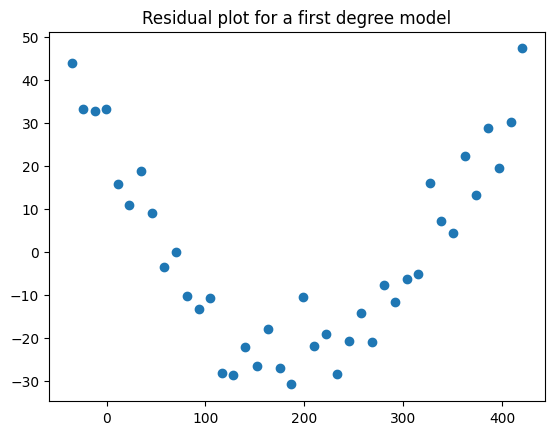

In [4]:
model = polyreg_model(1)
model.fit(X, Y)
y_pred = model.predict(X)
residuals = Y - y_pred
plt.scatter(x=y_pred, y=residuals)
plt.title('Residual plot for a first degree model')
plt.show()

Text(0.5, 1.0, 'Residual plot for a first degree model')

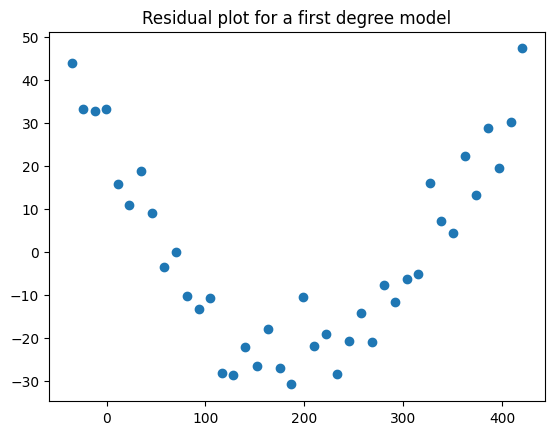

In [ ]:
# this cell was left to show that my output is the same as the expected one
model = polyreg_model(1)
model.fit(X, Y)
y_pred = model.predict(X)
residuals = ...

**What can you say about the behaviour of the model? (Overfit/underfit/perfect fit). Provide an argument.**

<font color='red'>
The plot of residuals with respect to the predictions demonstrates that predictions are significantly different from the true values: most predictions in the [100, 300] range are off by at least 10 points (and up to 30).

Since these results are witnessed on the trained data, it means the model is incapable for learning from the data, thus underfitting.
</font>

Now, <font color='white'>repeat the same process for the 2nd degree model:</font>

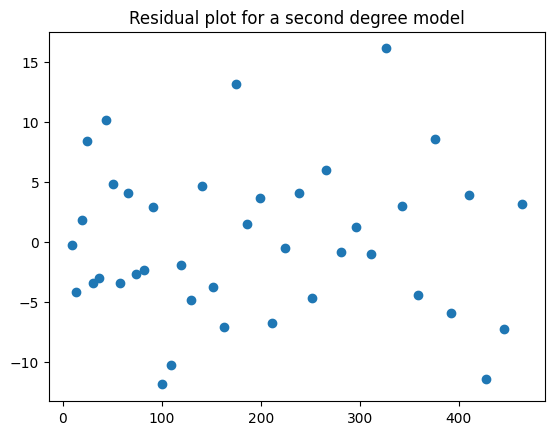

In [5]:
model = polyreg_model(2)
model.fit(X, Y)
y_pred = model.predict(X)
residuals = Y - y_pred
plt.scatter(x=y_pred, y=residuals)
plt.title('Residual plot for a second degree model')
plt.show()

Text(0.5, 1.0, 'Residual plot for a second degree model')

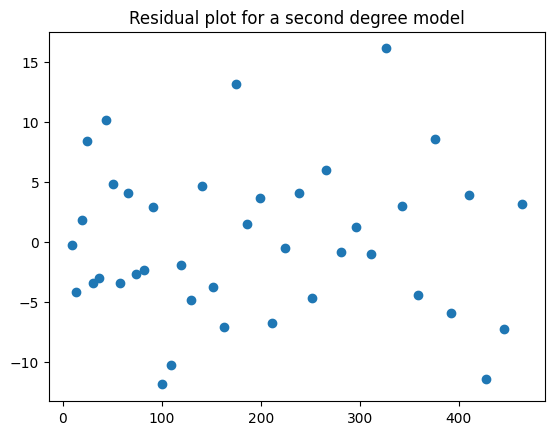

In [ ]:
# this cell was left to show that my output is the same as the expected one

**What do you see? Compare to a previous result.**

<font color='red'>
We can see that errors are now smaller on average: the predictions in range [100, 300] are now off by around 5 units which is a significant improvement on the previous model: (an error of at least 10 units... for the same range). 

The 2nd degree model is more suited for this problem.
</font>

## Jacknife residuals
The Jacknife residual (or R-Student residual) is defined as

$$
  r_{(-1)} = \frac{e_i}{\sqrt{MSE_{(-i)}(1 - h_i)}}
$$

where $MSE_{(-i)}$ is a residual MSE computed withoit $i$th observation. 

We compute $MSE = \frac{\sum e_i^2}{n - p - 1}$ where $p$ is a number of features. 

$h_i$ is $i$th diagonal element of the projection matrix $H = X(X^TX)^{-1}X^T$.

<font color='red'>
TODO: finalize the Jackknife residuals. 

Draw a residual plots for the 1st and 2nd degree models and compare those to ones you had before.
</font>

If an observation has a Jackknife residual that is larger than 3 (in absolute value) we can call it an *outlier*.


In [6]:
from numpy.linalg import inv
def jackknife_residuals(X, y, y_pred, p):  
  n = len(y)
  # compute the projection matrix: and extract the diagonal values
  H = np.diag(X @ inv(X.T @ X) @ X.T)
  H = H.reshape(-1, 1)
  # calculate the residuals
  residuals = (y - y_pred).reshape(-1, 1)
  # to calculate (MSE -i), we can calculate the sum of all e_i ^ 2, then subtract e_i ^ 2 (which is done here in a vectorized manner)
  # divide by (n - 1 - p - 1) = (n - p - 2)
  mse =  (np.sum(residuals ** 2) - residuals ** 2) / (n - p - 2) 
  return residuals / np.sqrt((mse * (1 - H)))
  

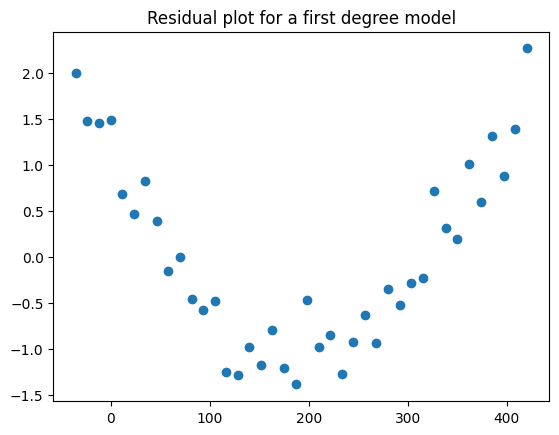

In [9]:
poly1 =  polyreg_model(1)
poly1.fit(X, Y)
yp1 =  poly1.predict(X)
jr1 = jackknife_residuals(X, Y, yp1, 1)

plt.scatter(x=yp1, y=jr1)
plt.title('Residual plot for a first degree model')
plt.show()

Text(0.5, 1.0, 'Residual plot for a first degree model')

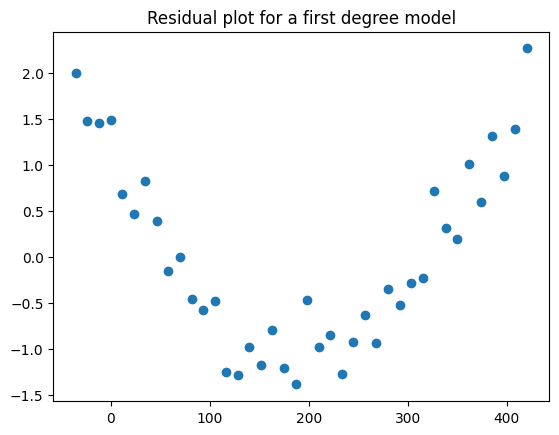

In [ ]:
# this cell was left to show that my output is the same as the expected one

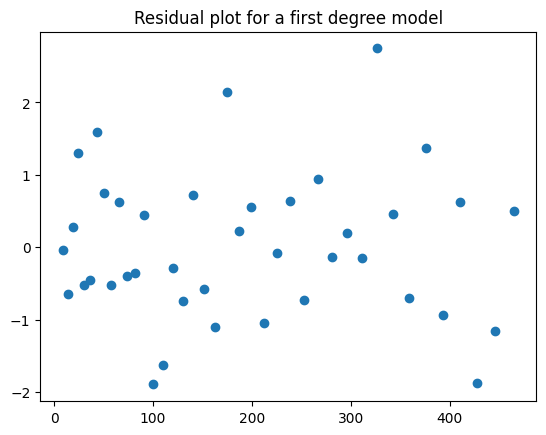

In [10]:
poly2 =  polyreg_model(2)
poly2.fit(X, Y)
yp2 =  poly2.predict(X)
jr2 = jackknife_residuals(X, Y, yp2, 2)

plt.scatter(x=yp2, y=jr2)
plt.title('Residual plot for a first degree model')
plt.show()

Text(0.5, 1.0, 'Residual plot for a second degree model')

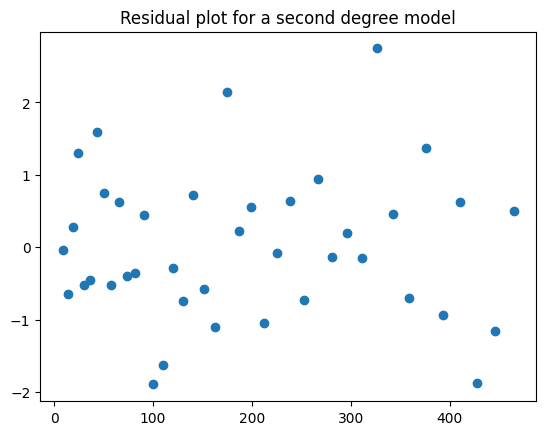

In [ ]:
# this cell was left to show that my output is the same as the expected one

**How new residual plots compare to the ones we had before?**

<font color='red'>

We can see that the plots are similar in the overall shape but with different ranges: the residuals are standarized which would help us better evaluate the performance / fitness of the model. 

For example, student redisual with absolute values larger than 3 are considered outliers. A large number of outliers should indicate a severely underfitting model.
</font>